# Inspiration
Socio-economic classification models in the Philippines has been very problematic. In fact, not one SEC model has been widely accepted. Government bodies uses their own SEC models and private research entities uses their own. We all know that household income is the greatest indicator of one's socio-economic classification that's why the publisher would like to find out the following:

1. Best model in predicting household income
2. Key drivers of household income, we want to make the model as sparse as possible
3. Some exploratory analysis in the data would also be useful

From <https://www.kaggle.com/grosvenpaul/family-income-and-expenditure>

---

## Libraries

In [4]:
# Import libraries to be used
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sb
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [5]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

4.14.3


In [6]:
import cufflinks as cf

In [7]:
# For Notebooks (MSJ: So things work in the notebook)
init_notebook_mode(connected=True)

In [8]:
# For offline use
cf.go_offline()

## Data import

In [10]:
# Importing csv data into pandas dataframes
df = pd.read_csv('./family-income-expenditure.csv')

In [11]:
df.head(5)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

## Playing

In [21]:
income_region = df.groupby('Region')['Total Household Income'].mean()

In [22]:
income_region = income_region.reset_index()

In [27]:
income_region.head()

,Region,Total Household Income
0,ARMM,134746.817616
1,CAR,269540.484638
2,Caraga,196907.376543
3,I - Ilocos Region,238110.084327
4,II - Cagayan Valley,236778.221721


In [30]:
income_region.iplot(kind='scatter',x='Region', y='Total Household Income')

In [31]:
income_region.iplot(kind='bar',x='Region', y='Total Household Income')

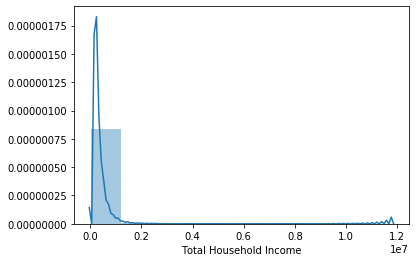

In [37]:
sb.distplot(df['Total Household Income'],kde=True,bins=10)

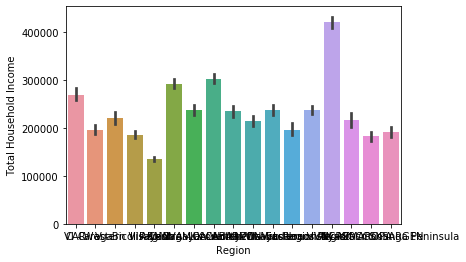

In [41]:
sb.barplot(x='Region',y='Total Household Income',data=df)